In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [3]:
df_insurance=pd.read_csv("insurance.csv")

In [4]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**Keşifsel Veri Analizi Yapılması**

## Keşifsel Veri Analizi Yapılması ##

In [6]:
## Keşifsel Veri Analizi Yapılması

In [7]:
## Bmi(Vücut Kitle İndeksi)’nin dağılımını
df_insurance["bmi"].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [72]:
# “smoker” ile “charges” arasındaki ilişki
# yes -> 1 no -> 0
smoker=df_insurance["smoker"]
smoker_categorical=smoker.astype('category').cat.codes
charges=df_insurance["charges"]

print(f"correlation between Smoker and Charges: {charges.corr(smoker_categorical)}")

correlation between Smoker and Charges: 0.7872343672800324


Smoker ve Charges feature’ların korelasyon ilişkisine baktığımızda 0.787251430498478’lik bir oranın olduğunu görüyoruz yani burada güçlü bir korelasyon ilişkisinde bahsedebiliriz.

In [9]:
# “smoker” ile region arasındaki ilişki

region=df_insurance["region"]
region_categorical=region.astype('category').cat.codes
region_labels=dict(zip(region.values,region_categorical))

print(f"correlation between Smoker and Region:{smoker_categorical.corr(region_categorical)}")

correlation between Smoker and Region:-0.002180682040934647


Smoker ve Region feature’ların korelasyon ilişkisine baktığımızda -0.002180682040934647 bir oranın olduğunu görüyoruz yani burada korelasyondan bahsedemeyiz

In [10]:
# bmi ile sex arasındaki ilişki
gender=df_insurance["sex"]
gender_categorical=gender.astype('category').cat.codes
gender_labels=dict(zip(gender.values,gender_categorical))

bmi=df_insurance["bmi"]

print(f"correlation between bmi and sex:{gender_categorical.corr(bmi)}")

correlation between bmi and sex:0.046371150646294566


Bmi ve Sex feature’ların korelasyon ilişkisine baktığımızda 0.046371150646294566 bir oranın olduğunu görüyoruz yani burada korelasyondan bahsedemeyiz

In [11]:
# En çok “children”’a sahip “region”’ı bulunuz.
region_children=df_insurance.groupby("region")["children"].sum()

print(f"en çok çocuğa'a sahip bölge {region_children.idxmax()}")
print("")
print(f"bölgelerin sahip olduğu çocuk sayıları:{region_children}")



en çok çocuğa'a sahip bölge southeast

bölgelerin sahip olduğu çocuk sayıları:region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64


In [12]:
#“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.
age=df_insurance["age"]
print(f"correlation between bmi and age:{age.corr(bmi)}")

correlation between bmi and age:0.1092718815485352


Age ve Bmi feature’ların korelasyon ilişkisine baktığımızda 0.1092718815485352 bir oranın olduğunu görüyoruz yani burada korelasyondan bahsedemeyiz

In [13]:
#children ile “bmi” arasındaki ilişkiyi inceleyiniz.
children=df_insurance["children"]
print(f"correlation between bmi and children:{children.corr(bmi)}")

correlation between bmi and children:0.012758900820673817


Children ve Bmi feature’ların korelasyon ilişkisine baktığımızda 0.012758900820673817 bir oranın olduğunu görüyoruz yani burada korelasyondan bahsedemeyiz

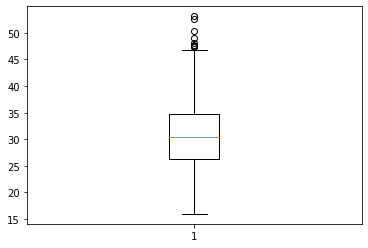

In [71]:
#“bmi” değişkeninde outlier var mıdır? İnceleyiniz.
fig, ax = plt.subplots()
ax.boxplot(bmi)
plt.show()

Evet outlier vardır. Aşağıdaki boxplot'ı incelediğimizde maximum değerden daha fazla olan değerler olduğunu görüyoruz.

In [15]:
#“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.

print(f"correlation between bmi and charges:{bmi.corr(charges)}")

correlation between bmi and charges:0.19834096883362895


Charges ve Bmi feature’ların korelasyon ilişkisine baktığımızda :0.19834096883362895 bir oranın olduğunu görüyoruz yani burada korelasyondan bahsedemeyiz

**4. Veri Ön İşleme Yapılması**

In [16]:
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
df_insurance.duplicated().value_counts()


False    1337
True        1
dtype: int64

In [18]:
df_insurance.drop_duplicates(keep="first", inplace=True)

In [19]:
df_insurance.duplicated().value_counts()

False    1337
dtype: int64

In [20]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df_insurance.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [22]:
label_encoder = preprocessing.LabelEncoder()  
df_insurance['sex']= label_encoder.fit_transform(df_insurance['sex'])
df_insurance['smoker']= label_encoder.fit_transform(df_insurance['smoker'])
df_insurance['region']= label_encoder.fit_transform(df_insurance['region'])
  

In [23]:
features=df_insurance.iloc[:,:-1].values ## Features
target=df_insurance.iloc[:,-1].values## Target


In [24]:
features.shape

(1337, 6)

In [25]:
target.shape


(1337,)

In [26]:
target=target.reshape(-1,1)

In [27]:
target.shape

(1337, 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle=True)

In [29]:
X_train.shape

(1069, 6)

In [30]:
X_test.shape

(268, 6)

## Modelling ##

**Linear Regression**

In [31]:
reg = LinearRegression()
reg.fit(X_train,y_train)
predictions=reg.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
RMSE = math.sqrt(MSE)
print(f"Mean Square Error:{MSE}")
print(f"Root Mean Square Error:{RMSE}")


Mean Square Error:45793538.68271667
Root Mean Square Error:6767.092335908877


**Linear Regression- Cross Validation**

In [32]:
reg_cross_validation = LinearRegression()
cv = KFold(n_splits=5, random_state=42, shuffle=True)

#use k-fold CV to evaluate model
scores = cross_val_score(reg_cross_validation, features, target, scoring='neg_root_mean_squared_error',
                         cv=cv)

In [33]:
#view mean absolute error
from statistics import mean
print(f"RMSE of Linear Regression with Cross Validation:{mean(abs(scores))}")


RMSE of Linear Regression with Cross Validation:6104.274573080894


In [34]:
plt.figure(figsize=(10, 10))
plt.scatter(df_insurance.index[-268:],y=y_test)
plt.plot(df_insurance.index[-268:],predictions,color="green")
plt.title( "Linear Regression")
plt.xlabel("Data index")
plt.ylabel("Charges")
plt.legend(["Predictions","Real Values"])
plt.show()

**Ridge Regression**

In [35]:
ridge_reg = Ridge(alpha=0.05, normalize=True)
ridge_reg.fit(X_train, y_train)
predictions_ridge=ridge_reg.predict(X_test)

MSE = mean_squared_error(y_test, predictions_ridge)
RMSE = math.sqrt(MSE)
print(f"Mean Square Error:{MSE}")
print(f"Root Mean Square Error:{RMSE}")

Mean Square Error:45748701.73991904
Root Mean Square Error:6763.778658406781


In [36]:
plt.figure(figsize=(10, 10))
plt.scatter(df_insurance.index[-268:],y=y_test)
plt.plot(df_insurance.index[-268:],predictions_ridge,color="green")
plt.title( "Ridge Regression")
plt.xlabel("Data index")
plt.ylabel("Charges")
plt.legend(["Predictions","Real Values"])
plt.show()

In [37]:
plt.show()

**Ridge Regression With Cross Validation**

In [38]:
ridge_reg_cross_validation = Ridge(alpha=0.05, normalize=True)

cv_ridge= KFold(n_splits=5, random_state=42, shuffle=True)

#use k-fold CV to evaluate model
scores_ridge = cross_val_score(ridge_reg_cross_validation, features, target, scoring='neg_root_mean_squared_error',
                         cv=cv)
print(f"RMSE of Ridge Regression with Cross Validation:{mean(abs(scores_ridge))}")

RMSE of Ridge Regression with Cross Validation:6122.560424163373


**Support Vector Regression**

In [39]:
## Gaussian
regressor_gaussian = SVR(kernel='rbf')
regressor_gaussian.fit(X_train,y_train)
predictions_gaussian=regressor_gaussian.predict(X_test)

In [40]:
## Polynomial
regressor_polynomial = SVR(kernel='poly')
regressor_polynomial.fit(X_train,y_train)
predictions_polynomial=regressor_polynomial.predict(X_test)

In [41]:
## Linear
regressor_linear = SVR(kernel='linear')
regressor_linear.fit(X_train,y_train)
predictions_linear=regressor_linear.predict(X_test)

In [42]:
MSE = mean_squared_error(y_test, predictions_gaussian)
RMSE = math.sqrt(MSE)
print(f"Mean Square Error of Gaussian:{MSE}")
print(f"Root Mean Square Error of Gaussian :{RMSE}")

Mean Square Error of Gaussian:183667958.20569384
Root Mean Square Error of Gaussian :13552.415216694544


In [43]:
MSE = mean_squared_error(y_test, predictions_polynomial)
RMSE = math.sqrt(MSE)
print(f"Mean Square Error of Polynomial:{MSE}")
print(f"Root Mean Square Error of Polynomial :{RMSE}")

Mean Square Error of Polynomial:180483994.63277227
Root Mean Square Error of Polynomial :13434.433171249626


In [44]:
MSE = mean_squared_error(y_test, predictions_linear)
RMSE = math.sqrt(MSE)
print(f"Mean Square Error of Linear:{MSE}")
print(f"Root Mean Square Error of Linear :{RMSE}")

Mean Square Error of Linear:181977654.24096322
Root Mean Square Error of Linear :13489.909348878637


**Support Vector Regression with Cross Validation**

In [45]:
gaussian_cross_validation= SVR(kernel='rbf')

cv_gaussian = KFold(n_splits=5, random_state=42, shuffle=True)

#use k-fold CV to evaluate model
scores_gaussian = cross_val_score(regressor_gaussian, features, target, scoring='neg_root_mean_squared_error',
                         cv=cv_gaussian)
print(f"RMSE of Gaussian with Cross Validation:{mean(abs(scores_gaussian))}")

RMSE of Gaussian with Cross Validation:12681.808090302862


In [46]:
linear_cross_validation = SVR(kernel='linear')

cv_linear = KFold(n_splits=5, random_state=42, shuffle=True)

#use k-fold CV to evaluate model
scores_linear = cross_val_score(linear_cross_validation, features, target, scoring='neg_root_mean_squared_error',
                         cv=cv_linear)
print(f"RMSE of Linear with Cross Validation:{mean(abs(scores_linear))}")

RMSE of Linear with Cross Validation:12874.183013784224


In [47]:
polynomial_cross_validation = SVR(kernel='poly')

cv_polynomial = KFold(n_splits=5, random_state=42, shuffle=True)

#use k-fold CV to evaluate model
scores_polynomial = cross_val_score(polynomial_cross_validation, features, target, scoring='neg_root_mean_squared_error',
                         cv=cv_polynomial)
print(f"RMSE of Polynomial with Cross Validation:{mean(abs(scores_polynomial))}")

RMSE of Polynomial with Cross Validation:12580.311787583498


**XGBOOST**

In [48]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

[17:41:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [49]:
predictions_xgb=model_xgb.predict(X_test)

In [50]:
MSE = mean_squared_error(y_test, predictions_xgb)
RMSE = math.sqrt(MSE)
print(f"Mean Square Error of XGBOOST:{MSE}")
print(f"Root Mean Square Error of XGBOOST :{RMSE}")

Mean Square Error of XGBOOST:28198026.41831274
Root Mean Square Error of XGBOOST :5310.181392223126


**XGBOOST-Cross Validation**

In [51]:
model_xgb_cross_validation = xgb.XGBRegressor()

cv_xgb = KFold(n_splits=5, random_state=42, shuffle=True)

#use k-fold CV to evaluate model
scores_xgb = cross_val_score(model_xgb_cross_validation, features, target, scoring='neg_root_mean_squared_error',
                         cv=cv_xgb)
print(f"RMSE of XGBOOST with Cross Validation:{mean(abs(scores_xgb))}")

[17:41:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE of XGBOOST with Cross Validation:4535.138534831871


## Grid Search ##

**Linear Regression**

In [52]:
parameters = {"fit_intercept": [True,False],
              "normalize": [True, False],
              "n_jobs": [5,10,15,20,-1], 
              "positive":[True,False]
             }
from sklearn.model_selection import GridSearchCV


In [53]:
reg = LinearRegression()
cv = KFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=reg, param_grid=parameters, scoring='neg_root_mean_squared_error', verbose=1,cv=cv)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', abs(grid_result.best_score_))
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Score:  5892.397555652328
Best Params:  {'fit_intercept': True, 'n_jobs': 5, 'normalize': True, 'positive': False}


**Ridge Regression**

In [54]:
parameters_ridge = {"alpha": [1, 10, 100, 290, 500],
              "fit_intercept": [True, False],
              "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 
              "max_iter":[5,10,15,20,25,30,35,40,45,50],
              "normalize":[True,False]
             }

In [55]:
ridge = Ridge()
grid = GridSearchCV(estimator=ridge, param_grid=parameters_ridge, scoring='neg_root_mean_squared_error', verbose=1,cv=cv_ridge)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', abs(grid_result.best_score_))
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Score:  5890.456888924273
Best Params:  {'alpha': 1, 'fit_intercept': True, 'max_iter': 50, 'normalize': False, 'solver': 'sag'}


**Support Vector Regression**

In [56]:
parameters_SVR = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "C": [1, 10, 100, 1000]}
]

In [57]:
svr_model=SVR()
cv_svr = KFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=svr_model, param_grid=parameters_SVR, scoring='neg_root_mean_squared_error', verbose=1,cv=cv_svr)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', abs(grid_result.best_score_))
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score:  6984.985445823164
Best Params:  {'C': 1000, 'kernel': 'linear'}


**XGBOOST**

In [58]:
parameters_xgb = {'max_depth': [2,4,6],
                  'n_estimators': [50,100,200]}

In [59]:
model_xgb = xgb.XGBRegressor()
cv_xgb = KFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=model_xgb, param_grid=parameters_xgb, scoring='neg_root_mean_squared_error', verbose=1,cv=cv_xgb)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', abs(grid_result.best_score_))
print('Best Params: ', grid_result.best_params_)

warnings.filterwarnings(action= 'ignore')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[17:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:59] WARNING: /workspace/src/objective/regres